In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() { if (code_show){ $('div.input').hide(); } else { $('div.input').show(); } code_show = !code_show } 
$( document ).ready(code_toggle);
</script>

Raw code hidden. To show code, click <a href="javascript:code_toggle()">here</a>. <b>To begin the notebook, click Kernel then click Restart & Run All. </b> ''')

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<center><h1>Combining and Editing Motifs to create 3D Basket Models</h1></center>
    
#### Authors: Howell Tan, Jenifer Pham & Laura Gutierrez Funderburk, Cedric Chauve
#### Contact: [Dr. Cedric Chauve](https://cchauve.github.io) and [Dr. Veselin Jungic](http://people.math.sfu.ca/~vjungic/)
#### This is joint collaboration with Tla'amin Nation members: Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters.
#### Acknowledgements:
We thank the Tla'amin Nation and members Ms. Betty Wilson, Ms. Gail Blaine, and Mr. Tyler Peters for sharing their knowledge and wisdom on the craft of traditional basket weaving. Without their openness this project would have not taken place. We also acknowledge that this work was conducted in unceded territory of the Musqueam , Skxwú7mesh, Tsleil-Waututh, Kwikwetlem nations. We thank PIMS and Cybera, as well as the Government of Canada for providing financial support and infrastructure.
#### Last modified: October 26, 2018

In [2]:
%matplotlib inline
%run -i ./python_scripts/modules.py
%run -i ./python_scripts/colours.py
%run -i ./python_scripts/atomic_rectangle.py
%run -i ./python_scripts/atomic_triangle.py
%run -i ./python_scripts/atomic_chevron.py
%run -i ./python_scripts/operations.py
%run -i ./python_scripts/plotting.py
%run -i ./python_scripts/modify_patterns.py

In [3]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

In [4]:
def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))

In [5]:
def save_joined_pattern(ev):
    global pattern_files
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")
    
    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    # Check if file name is taken
    if (file_name1.value in pattern_files):
        display( Markdown("The file <b>" +  file_name1.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name1.value + '</b>, delete the file and save again.') )
    
    # Write joined pattern into text file
    elif (file_name1.value != ''):
        file = open("./patterns/" + file_name1.value, "w")
        new_pattern = join_patterns(first, second, spacing.value)

        file.write(new_pattern)
        file.close()

        display(Markdown("Your motif has been saved as <b>" + file_name1.value + "</b>."))


def save_edited_pattern(ev):
    global pattern_files, mod_pattern
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))
     
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    # Remove checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
        
    # Check if file name is taken    
    if (file_name2.value in pattern_files):
        display( Markdown("The file <b>" +  file_name2.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name2.value + '</b>, delete the file and save again.') )
    
    # Write edited pattern into text file
    elif (file_name2.value != ''):
        file = open("./patterns/" + file_name2.value, "w")
        new_pattern = list_to_pattern_str(mod_pattern)
        
        file.write(new_pattern)
        file.close()

        display(Markdown("Your motif has been saved as <b>" + file_name2.value + "</b>."))

def save(pattern_string):
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")
    
    # Removed checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    #Check if file name is taken
    if (file_name3.value in pattern_files):
        display( Markdown("The file <b>" +  file_name3.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name3.value + '</b>, delete the file and save again.') )
    
    file path = os.path.join()
    text_file = open("sample.txt", "w")
    n = text_file.write(txt)
    text_file.close   
        
def save_created_pattern(ev):    
    global pattern_files, create_pattern
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))
     
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    # Removed checkpoints from folder if exists
    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
      
    # Check if file name is taken
    if (file_name3.value in pattern_files):
        display( Markdown("The file <b>" +  file_name3.value + '</b> already exists. If you still would like to save your pattern as <b>' + file_name3.value + '</b>, delete the file and save again.') )
    
    # Write newly created pattern into text file
    elif (file_name3.value != ''):
        file = open("./patterns/" + file_name3.value, "w")
        new_pattern = list_to_pattern_str(create_pattern)
        
        file.write(new_pattern)
        file.close()

        display(Markdown("Your motif has been saved as <b>" + file_name3.value + "</b>."))

def refresh_list(ev):
    global pattern_files
    
    # List Pattern Text Files
    pattern_files = os.listdir("./patterns/")

    if '.ipynb_checkpoints' in pattern_files:
        pattern_files.remove('.ipynb_checkpoints')
    
    # Rerun cell to refresh list of files in pattern folder
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.get_selected_index()+1)'))

def apply_alteration(ev):
    global create_button_clicked, join_button_clicked, edit_button_clicked
    create_button_clicked = True
    join_button_clicked = True
    edit_button_clicked = True
    
    # Run cell below
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))
    

In [6]:
global pattern_files, new_pattern, file_name, save_button

# Create folder name patterns in pattern folder does not exist
if not os.path.exists('patterns'):
    os.makedirs('patterns')
        
# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

# Remove checkpoints from folder if exists
if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')

    

In [7]:
# Define layout and style of widgets
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

## Combining motifs
   
The motifs that we have seen up until now have been generated from a single atomic motif. A basket sometimes displays multiple motifs, combined together. To do so, our tool below allows to select two motifs created previously, set the desired spacing between them, and click the Join motifs button. 

Two motifs of the same height will be simply be previewed side by side. motifs of unequal heights need additional blocks added to the top and bottom of the motif with lower valued height in order for the height dimensions to match. Thus, the motif of lower valued height will be horizontally centered alongside the motif with higher valued height. 

Once two motifs have been joined, you can save the motif and continue to combine more motifs to your new motif if you wish. If you have saved your motif but do not see the file in the dropdown menu, try clicking on the Refresh Files button.


In [30]:
global join_button_clicked
join_button_clicked = False

# Layout for widgets
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

# Create dropdown menu for patterns
first_pattern = widgets.Dropdown(options = pattern_files, description ='Motif 1:', style = style, disabled=False,)
second_pattern = widgets.Dropdown(options = pattern_files, description ='Motif 2:', style = style, disabled=False,)
spacing = widgets.IntSlider(value = 0, min = 0, max = 10, description = "Spacing Amount", style = style)

# Create join and refresh button and define click events
join_button = widgets.Button( button_style= 'info', description="Join Motifs")
join_button.on_click(apply_alteration)

refresh_button = widgets.Button( button_style= 'info', description="Refresh Files")
refresh_button.on_click(refresh_list)

display(Box(children = [first_pattern, second_pattern, refresh_button], layout = box_layout))
display(VBox(children = [spacing, join_button], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='100%', justify_content = 'center')))

# Create saving widgets
save_button1 = widgets.Button(button_style= 'info',description="Save")
save_button1.on_click(save_joined_pattern)

file_name1 = widgets.Text(value = '', description='File Name:', disabled=False)

<IPython.core.display.Javascript object>

Box(children=(Dropdown(description='Motif 1:', options=('Diamond', 'AtomicSnake', 'Square Rectangle', 'Expande…

<center> <h3> Motif Preview </h3>

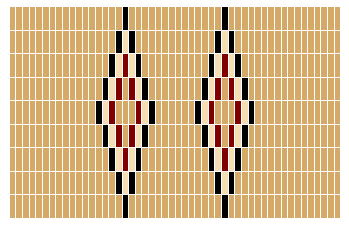

In [28]:
if (join_button_clicked == True and pattern_files != []):
    
    display(Markdown('<center> <h3> Motif Preview </h3>'))
    
    # Read chosen pattern text files, join the patterns and display new pattern
    first = open('./patterns/'+ first_pattern.value, 'r') 
    first = first.read()
    second = open('./patterns/'+ second_pattern.value, 'r') 
    second = second.read()

    new_pattern = join_patterns(first, second, spacing.value)
    plot_motif_2D(new_pattern, ori_p)

In [32]:
if (join_button_clicked == True and pattern_files != []):

    display(file_name1, save_button1)

<IPython.core.display.Javascript object>

## Editing motifs
    
In the interactive below, we can manually edit motifs by clicking. Start by choosing one of the available motifs. To edit your motif, choose a color and click on a block in your motif display to change its color. To erase, choose the last color and click on the block you wish to erase.

In [11]:
global mod_pattern, edit_button_clicked
edit_button_clicked = False

# Create widgets for editing patterns
pattern_to_edit = widgets.Dropdown(options = pattern_files, description ='Motif:', style = style, disabled=False,)
edit_button = widgets.Button( description = 'Edit', button_style = 'info')
edit_button.on_click(apply_alteration)
display(Box( children = [pattern_to_edit, refresh_button], layout = box_layout))
display(Box( children = [edit_button], layout = box_layout))

# Create saving widgets
save_button2 = widgets.Button(button_style= 'info',description="Save")
save_button2.on_click(save_edited_pattern)

file_name2 = widgets.Text(value = '', description='File Name:', disabled=False)

Box(children=(Dropdown(description='Motif:', options=('Diamond', 'AtomicSnake', 'Square Rectangle', 'Expanded …

Box(children=(Button(button_style='info', description='Edit', style=ButtonStyle()),), layout=Layout(align_item…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

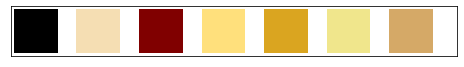

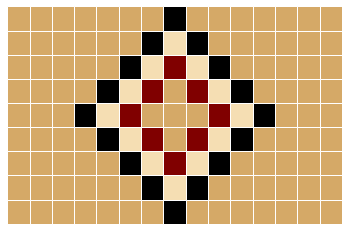

In [35]:
if (edit_button_clicked == True and pattern_files != []):
    
    # Read chosen pattern text file, and display pattern for editing
    pattern = open('./patterns/'+ pattern_to_edit.value, 'r') 
    pattern = pattern.read()
    
    edit(pattern, ori_p)

In [36]:
if (edit_button_clicked == True and pattern_files != []):
    
    display(file_name2, save_button2)

Text(value='', description='File Name:')

Button(button_style='info', description='Save', style=ButtonStyle())

## Create Your Own motif
    
All motifs emerge from a blank canvas. Here, you have full autonomy to create your own motif from scratch. Start by specifying the height and width of your canvas. That is, choose the number of respective rows and columns you would like your canvas to have. Note only positive integers values will be accepted. Decimal inputs will be rounded down to the nearest integer.

Once you have specified your dimensions, click the Create Canvas button. To create your motif, choose a color and click on a block to change its color. To erase, choose the last color and click on the block you wish to erase.

In [14]:
global create_button_clicked
create_button_clicked = False

# Create widgets for creating pattern
height_box = widgets.BoundedIntText(value = 10, min = 1, description = 'Height', disabled = False, layout = Layout(width = "20%", height = "30px"))
width_box = widgets.BoundedIntText(value = 20, min = 1, description = 'Width', disabled = False, layout = Layout(width = "20%", height = "30px"))
create_button = widgets.Button(button_style = 'info', description = 'Create Canvas')

display(Box([height_box, width_box, create_button], layout = box_layout))

create_button.on_click(apply_alteration)

# Create saving widgets
save_button3 = widgets.Button(button_style= 'info',description="Save")
save_button3.on_click(save_created_pattern)

file_name3 = widgets.Text(value = '', description='File Name:', disabled=False)

Box(children=(BoundedIntText(value=10, description='Height', layout=Layout(height='30px', width='20%'), min=1)…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

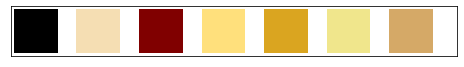

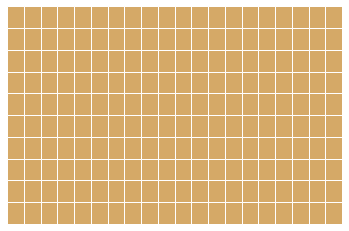

In [26]:
if (create_button_clicked == True):
    # Creates a string filled with the plain blocks based on the specified dimensions
    canvas_st = height_box.value*(width_box.value*'-' + '\n')
    create(canvas_st, ori_p)

In [31]:
if (create_button_clicked == True):
    
    display(file_name3, save_button3)
    

<IPython.core.display.Javascript object>

Text(value='', description='File Name:')

Button(button_style='info', description='Save', style=ButtonStyle())

## Creating 3D Basket Models

A *net* of a 3D shape is an arrangement of two dimensional shapes which can be folded along the edges to become the faces of the 3D shape.  Given a rectangular basket (without a lid cover), we see that the net of the basket consists of five shapes: one rectangle, which makes up the bottom of the basket, and four trapezoids, which make up the sides. Hence, we can add up to four motifs to generate a 3D model of a rectangular basket with motifs.

<center> <img src="./images/net-rect.png" alt="Rectangular Basket and Net" width = 50%>
    
Given a circular basket (without a lid cover), we see that the net of the basket consists of only two shapes. The bottom of the basket is circular in shape and the surface, making up the sides of the basket can be thought of as a single curved trapezoid. Hence, we only require one motif to generate a 3D model of a circular basket with motifs.

<center> <img src="./images/net-circ.png" alt="Circular Basket and Net" width = 50%>

To place your motifs onto 3D models, first choose a basket shape and then choose the motif you would like to see on each face. If you have saved your motif but do not see the file in the dropdown menu, try clicking on the Refresh Files button. 

In [17]:
def toggle_button_run_cell(change):
    # Run next 4 cells once toggle is changed to display appropriate widgets
    value = change['new']
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+5)'))

def refresh_list(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()-1, IPython.notebook.get_selected_index()+1)'))
    
def plot_basket(ev):
    global files_selected
    files_selected = True
    
    # Run next cell to plot basket
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))


In [18]:
global files_selected
files_selected = False

# Create Toggle Buttons for basket shape selection
basket_options = widgets.ToggleButtons(
    button_style = 'info',
    options=['Rectangular Basket', 'Circular Basket'],
    description='',
    disabled=False,
    layout = Layout(display='flex',
                    align_items='stretch',
                    justify_content = 'center'))

display(basket_options)
basket_options.observe(toggle_button_run_cell, 'value')

ToggleButtons(button_style='info', layout=Layout(align_items='stretch', display='flex', justify_content='cente…

In [19]:
basket_chose = basket_options.value

# Display example of basket image
if (basket_chose == 'Rectangular Basket'):
    display(Markdown('<center><h2> Rectangular Basket </h2>'))
    display(Markdown('<center> <img src="./images/rect-basket.png" alt="Rectangular Basket">'))

elif (basket_chose == 'Circular Basket'):
    display(Markdown('<center><h2> Circular Basket </h2>'))
    display(Markdown('<center> <img src="./images/circ-basket.png" alt="Circular Basket">'))


<center><h2> Rectangular Basket </h2>

<center> <img src="./images/rect-basket.png" alt="Rectangular Basket">

In [20]:
# List Pattern Text Files
pattern_files = os.listdir("./patterns/")

if '.ipynb_checkpoints' in pattern_files:
    pattern_files.remove('.ipynb_checkpoints')
    
box_layout = Layout(display='flex', flex_flow='row', align_items='center', width='100%', justify_content = 'center')
style = {'description_width': 'initial'}

In [21]:
# Create Refresh Button
refresh_button = widgets.Button( button_style= 'info', description="Refresh Files")
refresh_button.on_click(refresh_list)

# Create Plot Button
plot_button = widgets.Button( button_style= 'info', description="Plot Basket")
plot_button.on_click(plot_basket)

# Create Dropdown Menus for Faces of the Rectangular Basket
front_pattern = widgets.Dropdown(options = pattern_files, description ='Front Motif:', style = style, disabled=False,)
back_pattern = widgets.Dropdown(options = pattern_files, description ='Back Motif:', style = style, disabled=False,)
left_pattern = widgets.Dropdown(options = pattern_files, description ='Left Side Motif:', style = style, disabled=False,)
right_pattern = widgets.Dropdown(options = pattern_files, description ='Right Side Motif:', style = style, disabled=False,)

box1 = VBox([front_pattern, back_pattern], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='50%', justify_content = 'center'))
box2 = VBox([left_pattern, right_pattern], layout = Layout(display= 'flex', flex_flow= 'column', align_items= 'center', width='50%', justify_content = 'center'))

# Create Dropdown Menu for Face of the Circular Basket
circ_pattern = widgets.Dropdown(options = pattern_files, description ='Motif:', style = style, disabled=False,)

if (basket_chose == 'Rectangular Basket'):
    
    display(Box(children = [box1, box2], layout = box_layout))
    display(Box(children = [plot_button, refresh_button], layout = box_layout))
    
elif (basket_chose == 'Circular Basket'):
    
    display(Box(children = [circ_pattern, refresh_button], layout = box_layout))
    display(Box(children = [plot_button], layout = box_layout))


Box(children=(VBox(children=(Dropdown(description='Front Motif:', options=('Diamond', 'AtomicSnake', 'Square R…

Box(children=(Button(button_style='info', description='Plot Basket', style=ButtonStyle()), Button(button_style…

In [22]:
# Check if files have been selected 
# Assign pattern to appropriate face(s) and plot basket
if files_selected == True:  
    if (basket_chose == 'Rectangular Basket'):

        front = open('./patterns/'+ front_pattern.value, 'r') 
        front = front.read()

        back = open('./patterns/'+ back_pattern.value, 'r') 
        back = back.read()

        left = open('./patterns/'+ left_pattern.value, 'r') 
        left = left.read()

        right = open('./patterns/'+ right_pattern.value, 'r') 
        right = right.read()

        plot_rect_basket(front, back, left, right, ori_p)

    elif (basket_chose == 'Circular Basket'):
        pattern = open('./patterns/'+ circ_pattern.value, 'r')
        pattern = pattern.read()
        plot_circ_basket(pattern, ori_p)
    

    files_selected = False

In [23]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
            
                jupyter.actions.call('jupyter-notebook:save-notebook');
                
            });
        }
    );
</script>

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)